# California Housing Prices

__Kaggle__: https://www.kaggle.com/camnugent/california-housing-prices

The data contains information from the 1990 California census. The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

__Libraries__

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

#Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Evaluation
from sklearn.metrics import r2_score # R2
from sklearn.metrics import mean_squared_error # RMSE

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

## Import Data and Explore Data

In [2]:
dataset = pd.read_csv('housing.csv')
dataset.shape

(20640, 10)

In [3]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
dataset['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Cleaning Data

### Filling the NA values form total_bedrooms

In [7]:
median = dataset['total_bedrooms'].median()

dataset['total_bedrooms'].fillna(median, inplace=True)

### Transforming Categorical Values - One Hot Encoding

In [8]:
# Select the categories
hcategories = dataset[['ocean_proximity']]

In [9]:
# Declare the encoder and fit transform
encoder = OneHotEncoder()
housingCat = encoder.fit_transform(dataset[['ocean_proximity']])

In [10]:
# From SciPy matrix to a NumPy array
array = housingCat.toarray()
array

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [11]:
# Encoder categories
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [12]:
encoderDF = pd.DataFrame(array, columns=encoder.categories_)

In [13]:
encoderDF

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [14]:
dataset = pd.concat([dataset, encoderDF], axis=1).drop(['ocean_proximity'], axis=1)
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,1.0,0.0,0.0,0.0


### Analysis Median House Value

In [15]:
dataset[dataset['median_house_value'] < 0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,"(<1H OCEAN,)","(INLAND,)","(ISLAND,)","(NEAR BAY,)","(NEAR OCEAN,)"


### Outlier Analysis

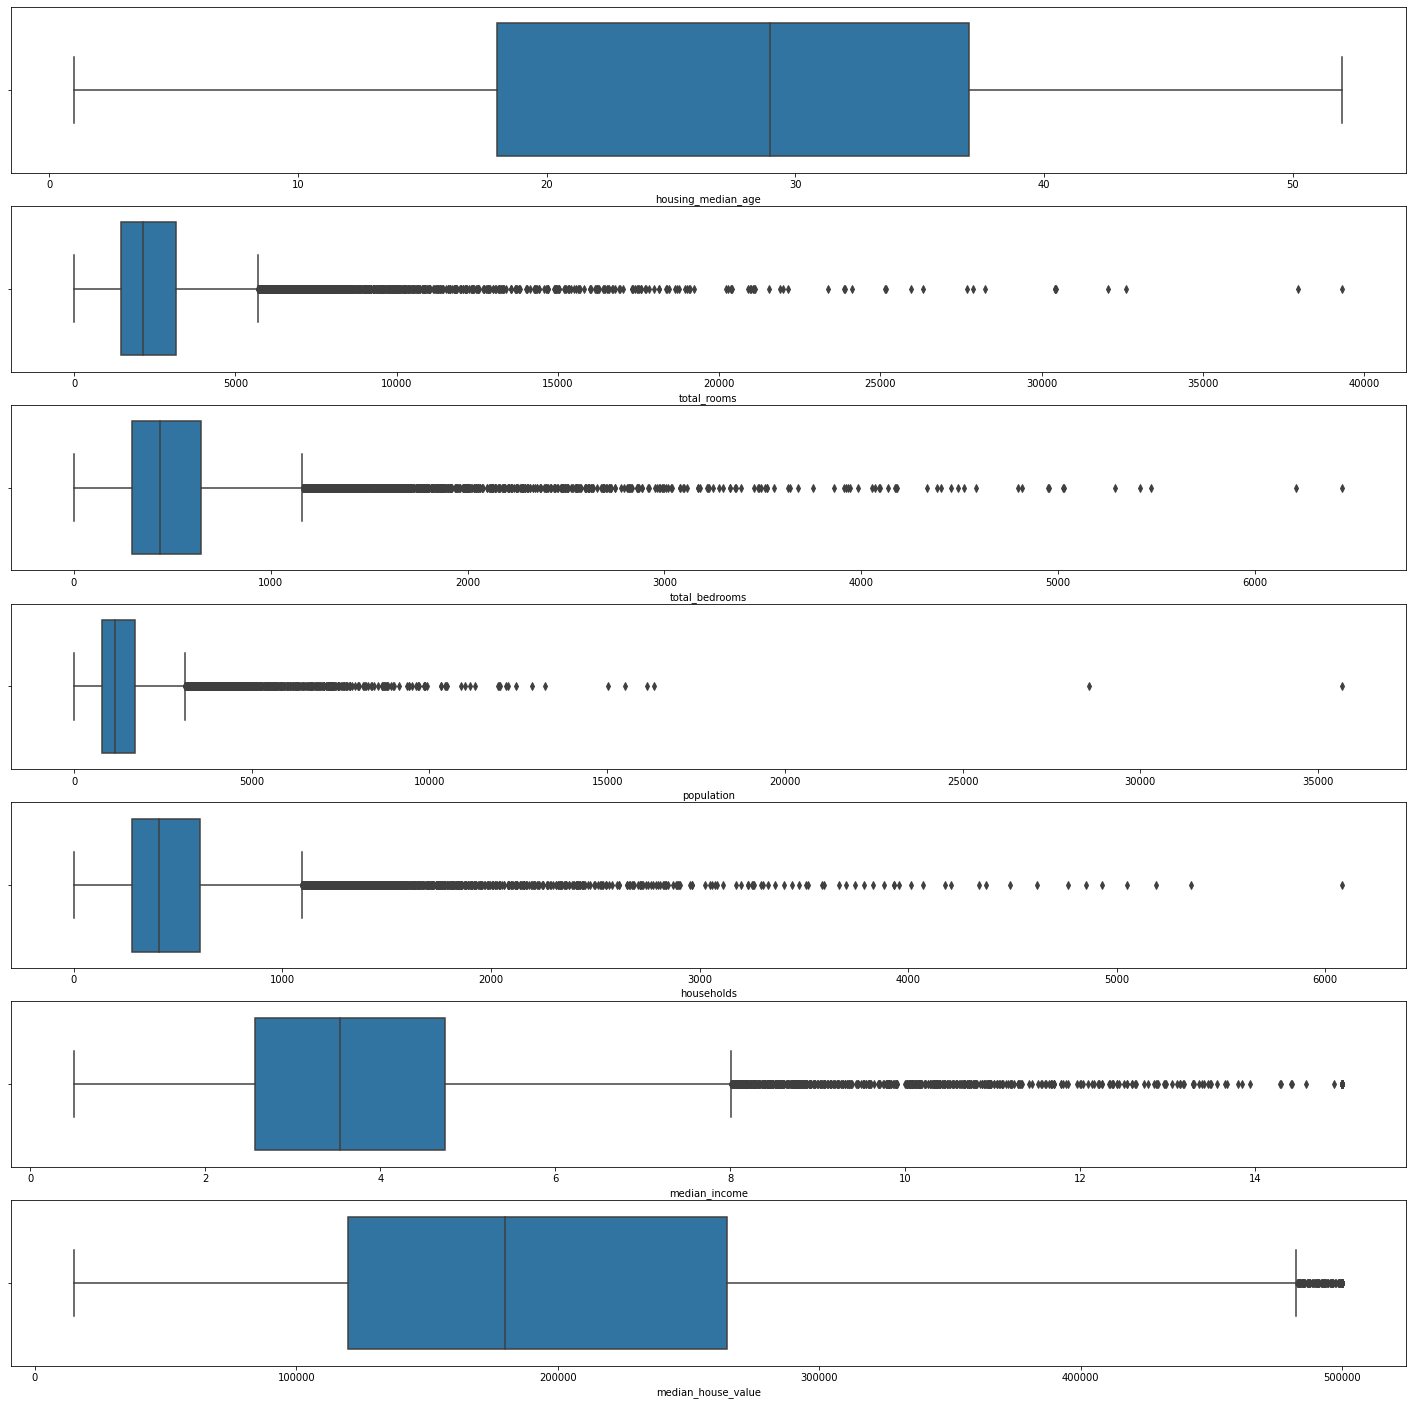

In [16]:
fig, axs = plt.subplots(7,1, figsize = (25,25))
plt_age = sns.boxplot(dataset['housing_median_age'], ax = axs[0])
plt_rooms = sns.boxplot(dataset['total_rooms'], ax = axs[1])
plt_bedrooms = sns.boxplot(dataset['total_bedrooms'], ax = axs[2])
plt_population = sns.boxplot(dataset['population'], ax = axs[3])
plt_households = sns.boxplot(dataset['households'], ax = axs[4])
plt_income = sns.boxplot(dataset['median_income'], ax = axs[5])
plt_value = sns.boxplot(dataset['median_house_value'], ax = axs[6])
plt.show()

###### Drop Median House Value Outliers

In [17]:
Q1 = dataset.median_house_value.quantile(0.25)
Q3 = dataset.median_house_value.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[(dataset.median_house_value >= Q1 - 1.5*IQR) & (dataset.median_house_value <= Q3 + 1.5*IQR)]

In [18]:
dataset.shape

(19569, 14)

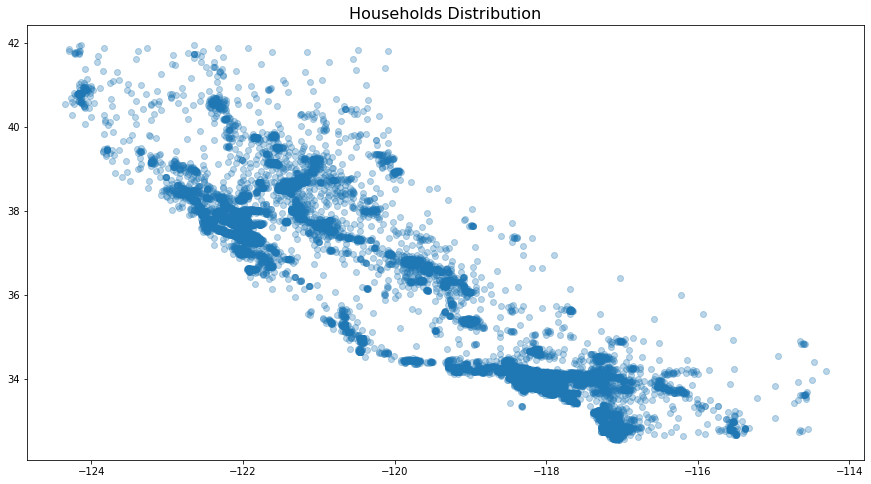

In [22]:
# Plot Geographic Data

plt.figure(figsize=(15,8))
plt.scatter(dataset['longitude'], dataset['latitude'], alpha=0.3)
plt.title("Households Distribution",size=16)
plt.show()

### Split Data

In [23]:
X = dataset.drop(columns=['median_house_value'])
y = dataset.median_house_value

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression

### Build, Train and Predict

In [25]:
lr = LinearRegression(normalize=True)
lr = lr.fit(X_train, y_train)

In [26]:
y_pred = lr.predict(X_test)

### Evaluate the Model

In [27]:
lr.score(X_test, y_test)

0.623544270258648

In [28]:
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_rmse

59004.566217040905

In [29]:
print('Mean Squared Error: %.4f' % mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error %0.4f' %lr_rmse)
print('Coefficient of Determination (r2) %.4f' % r2_score(y_test, y_pred))

Mean Squared Error: 3481538834.4612
Root Mean Squared Error 59004.5662
Coefficient of Determination (r2) 0.6235


In [30]:
coeff = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])

print('Intercept: %.4f' %lr.intercept_)
print('Coefficients:')
coeff

Intercept: 71363987139469352.0000
Coefficients:


,Coefficient
longitude,-2.373296e+04
latitude,-2.184066e+04
housing_median_age,8.056030e+02
total_rooms,-4.460567e+00
total_bedrooms,5.945219e+01
population,-3.457545e+01
households,7.507524e+01
median_income,3.674149e+04
"(<1H OCEAN,)",-7.136399e+16
"(INLAND,)",-7.136399e+16


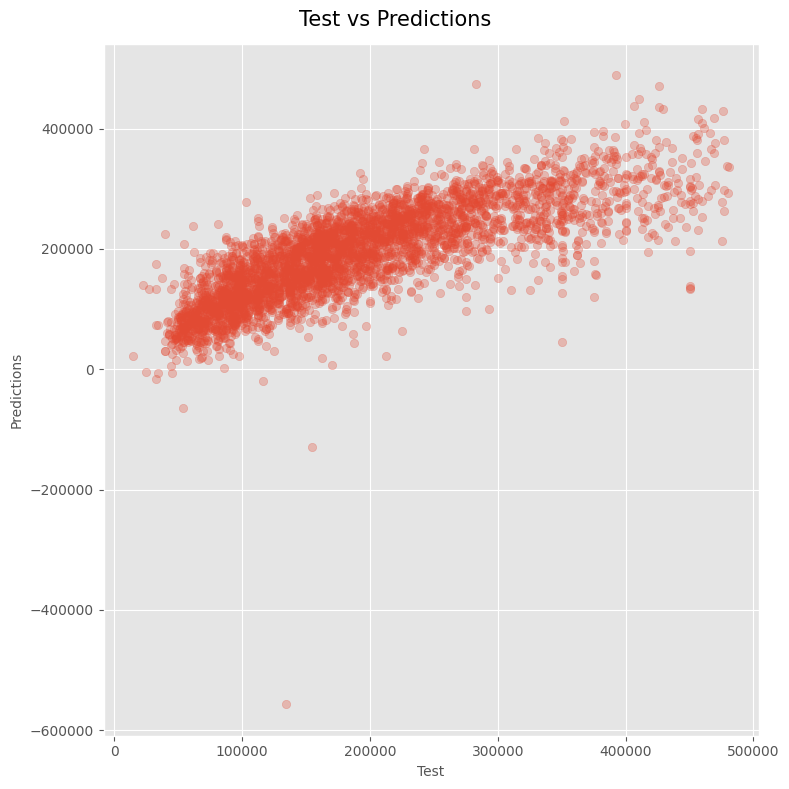

In [33]:
# Plotting y_test and y_pred

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y_test, y_pred, alpha=0.3)
plt.suptitle('Test vs Predictions', fontsize=15)              # Plot heading 
plt.xlabel('Test', fontsize=10)                               # X-label
plt.ylabel('Predictions', fontsize=10)                        # Y-label


fig.tight_layout()

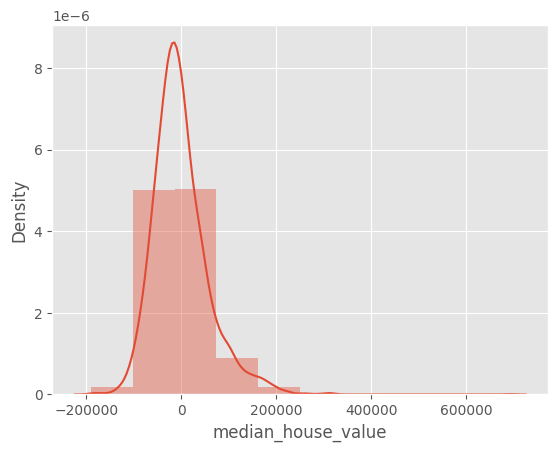

In [32]:
sns.distplot((y_test-y_pred), bins=10)
plt.show()